# Lung Data - Survival Analysis with R

## The Lung Dataset

I use the lung dataset available from the survival package survival. 
The data contain subjects with advanced lung cancer from the North Central Cancer Treatment Group.
It includes the 10 following variables:

- inst:  Institution code
- time:  Survival time in days
- status:  censoring status 1=censored, 2=dead
- age:  Age in years
- sex:  Male=1 Female=2
- ph.ecog: ECOG performance score (0=good 5=dead)
- ph.karno:  Karnofsky performance score (bad=0-good=100) rated by physician
- pat.karno:  Karnofsky performance score (0 = bad, 100 = good) as rated by patient
- meal.cal:  Calories consumed at meals
- wt.loss:  Weight loss in last six months


In [1]:
# Load the packages

library(survival)
library(ggplot2)
library(survminer)

필요한 패키지를 로딩중입니다: ggpubr


다음의 패키지를 부착합니다: 'survminer'


The following object is masked from 'package:survival':

    myeloma




In [18]:
# View the data

head(lung)
class(lung)
dim(lung)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0


[1] "tbl_df"     "tbl"        "data.frame"

[1] 228  10

I used the survfit() function to estimate the time of death. For the purpose of creating a simple survival curve that does not consider any different groupings, I specified just an intercept (e.g., ~1) in the formula that survfit expects. First, I calculated the cumulative hazard estimates for lung data. From left to right, you can see the time, remaining number of individuals, number of events, estimated survival distribution, standard error for the survival function, survival function estimate, and its 95% confidence interval.

In [4]:
m_s <- survfit(formula = Surv(time,status) ~ 1, data=lung)
summary(m_s)

Call: survfit(formula = Surv(time, status) ~ 1, data = lung)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    5    228       1   0.9956 0.00438       0.9871        1.000
   11    227       3   0.9825 0.00869       0.9656        1.000
   12    224       1   0.9781 0.00970       0.9592        0.997
   13    223       2   0.9693 0.01142       0.9472        0.992
   15    221       1   0.9649 0.01219       0.9413        0.989
   26    220       1   0.9605 0.01290       0.9356        0.986
   30    219       1   0.9561 0.01356       0.9299        0.983
   31    218       1   0.9518 0.01419       0.9243        0.980
   53    217       2   0.9430 0.01536       0.9134        0.974
   54    215       1   0.9386 0.01590       0.9079        0.970
   59    214       1   0.9342 0.01642       0.9026        0.967
   60    213       2   0.9254 0.01740       0.8920        0.960
   61    211       1   0.9211 0.01786       0.8867        0.957
   62    210       1   0.9167 0.01830     

I used the quantile() function to estimate the time of death. I found that the time at which 50% of patients are estimated to die, i.e., the median, is 310 days.

In [5]:
quantile(m_s, probs=c(0.25,0.5,0.75))

$quantile
 25  50  75 
170 310 550 

$lower
 25  50  75 
145 285 460 

$upper
 25  50  75 
197 363 654

Before visualizing it with a Kaplan-Meier plot, I fit survival curves separately for each sex. We first calculated the cumulative hazard estimates for each sex, and found that the median survival time for Sex1 (male) was 270 days and for Sex2 (female) was 426 days.

In [6]:
m_s_sex <- survfit(Surv(time,status)~sex,data=lung)
m_s_sex

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

I used the ggsurvplot() function to visualize the survival curves with a Kaplan-Meier plot. (There is a package called survminer that provides a function called ggsurvplot() that makes it much easier to produce publication-ready survival plots.)

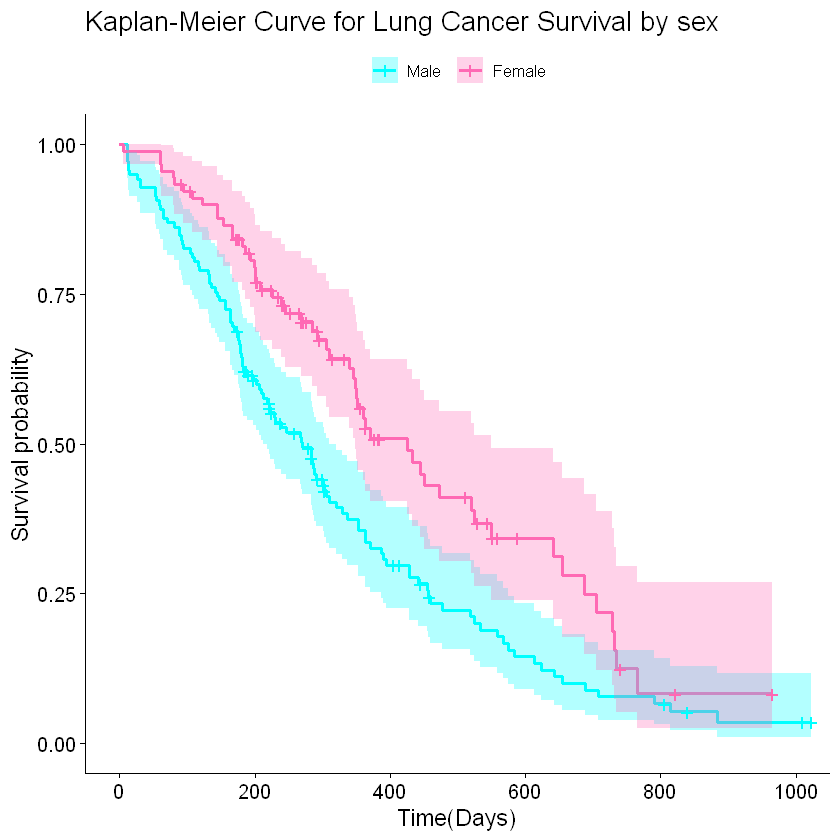

In [8]:
ggsurvplot(m_s_sex, title = "Kaplan-Meier Curve for Lung Cancer Survival by sex",
           risk.table = F, xlim = c(0,1000),
           break.time.by = 200,
           xlab = "Time(Days)",
           conf.int = T,
           legend.title = "",
           legend.labs = c("Male","Female"),
           palette = c("cyan", "hot pink"))

To compare the survival curves by gender, I used the survdiff() function to perform a log-rank test.

- Null hypothesis (H0): There is no difference in the survival curves by gender.
- Alternative hypothesis (H1): There is a difference in the survival curves by gender.

The p-value was 0.001, which is smaller than the significance level of 0.05. Therefore, I can reject the null hypothesis and conclude that there is a difference in the survival curves by gender.

In [20]:
survdiff(Surv(time,status)~sex,data=lung)

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

Cox PH regression can assess the effect of both categorical and continuous variables, and can model the effect of multiple variables at once. To test for differences in the time of death based on gender and age, I conducted a Cox proportional hazards regression analysis using the coxph() function. 

In [21]:
cox <- coxph(Surv(time,status)~sex+age,data=lung)
summary(cox)

Call:
coxph(formula = Surv(time, status) ~ sex + age, data = lung)

  n= 228, number of events= 165 

         coef exp(coef)  se(coef)      z Pr(>|z|)   
sex -0.513219  0.598566  0.167458 -3.065  0.00218 **
age  0.017045  1.017191  0.009223  1.848  0.06459 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    exp(coef) exp(-coef) lower .95 upper .95
sex    0.5986     1.6707    0.4311    0.8311
age    1.0172     0.9831    0.9990    1.0357

Concordance= 0.603  (se = 0.025 )
Likelihood ratio test= 14.12  on 2 df,   p=9e-04
Wald test            = 13.47  on 2 df,   p=0.001
Score (logrank) test = 13.72  on 2 df,   p=0.001


Looking at the output, there are test statistics for the hypothesis that all regression coefficients are 0, including the likelihood ratio test, Wald test statistic, and score test. All three statistics are smaller than the significance level of 0.05, so the null hypothesis is rejected. Therefore, at least one covariate is significant. Looking at the regression coefficient output for age, the coefficient for patient status at diagnosis is 0.017 and the p-value is greater than the significance level of 0.05, so it is not significant. The hazard ratio shows that for each additional year of age, the hazard increases by a factor of 1.0172. Moving on to the results for sex, the coefficient is -0.5132, indicating that females have a lower risk of death compared to males. Additionally, the p-value is less than the significance level of 0.05, so it is significant. Looking at the hazard ratio for sex, exp(coef) is 0.5986, which means that females have a 41% lower risk of death compared to males.